In [ ]:
# necessary libraries added.
import cv2
import numpy as np
from skimage import io
from scipy.spatial import distance
import matplotlib.pyplot as plt

### Upload a pair of personal images in a hosting place that can be accessed using an URL.

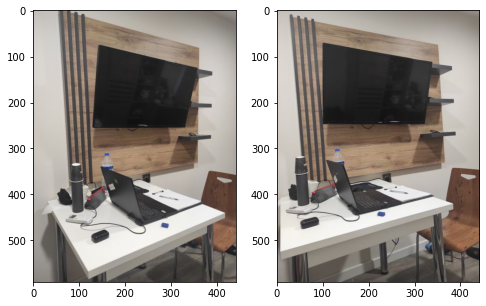

In [ ]:
# Images from git repo
url = 'https://raw.githubusercontent.com/burakkececi/image-processing/main/src/1.jpg'
url2 = 'https://raw.githubusercontent.com/burakkececi/image-processing/main/src/2.jpg'
colorImgL = io.imread(url)
colorImgL = np.ascontiguousarray(colorImgL, dtype=np.uint8) # define the images are contiguous otherwise images not work properly.
colorImgR = io.imread(url2)
colorImgR = np.ascontiguousarray(colorImgR, dtype=np.uint8) # same as above
plt.figure(figsize = (8,8))
plt.subplot(121)
plt.imshow(colorImgL)
plt.subplot(122)
plt.imshow(colorImgR)

### Convert your images into grayscale.

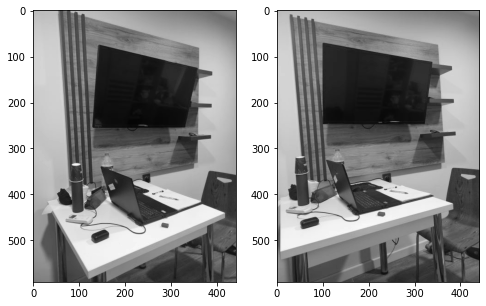

In [ ]:
imgL = cv2.cvtColor(colorImgL, cv2.COLOR_BGR2GRAY) # changes images to gray scale
imgR = cv2.cvtColor(colorImgR, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (8,8))
plt.subplot(121)
plt.imshow(imgL, 'gray')
plt.subplot(122)
plt.imshow(imgR, 'gray')

### Use built-in SIFT keypoint and descriptor extraction (sift.detectAndCompute) to get the descriptors from both left and right images.

In [ ]:
sift = cv2.SIFT_create() # creating SIFT

keypoints_1, descriptors_1 = sift.detectAndCompute(imgL, None) # ready to use functions for SIFT operations.
keypoints_2, descriptors_2 = sift.detectAndCompute(imgR, None)


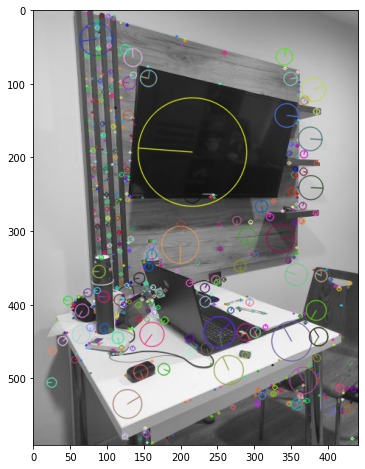

In [ ]:
img1=cv2.drawKeypoints(imgL,keypoints_1,colorImgL,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (8,8))
plt.imshow(img1)

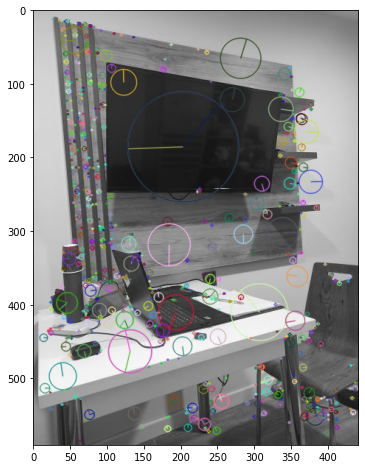

In [ ]:
img2=cv2.drawKeypoints(imgR,keypoints_2,colorImgR,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (8,8))
plt.imshow(img2)

In [ ]:
# descriptor of image left
print(descriptors_1[0,:])

[116.  24.   0.   0.   4.   2.   0.   3. 130. 130.   0.   0.   0.   0.
   0.   0.  78.  65.   0.   0.   0.   1.   5.   2.   2.   0.   0.   0.
   0.   1.   4.   1. 111.  14.   0.   0.   9.   7.   0.   2. 130.  90.
   0.   0.   0.   0.   0.   3. 130.  93.   0.   0.   0.   0.   0.  11.
  15.   2.   0.   0.   0.   0.   1.   3.  92.  11.   0.   0.  37.  68.
   2.   4. 130.  10.   0.   0.   0.   0.   0.  58. 130.   6.   0.   0.
   0.   0.   0. 103.  14.   0.   0.   0.   0.   0.   0.   8.  28.   1.
   0.   0.  77. 130.  11.  13. 130.   1.   0.   0.   1.   7.   3. 123.
 109.   0.   0.   0.   0.   0.   0.  94.   2.   0.   0.   0.   0.   0.
   0.   3.]


In [ ]:
# descriptor of image right
print(descriptors_2[0,:])
len(descriptors_2)

[  2.   7.   2.   0.   0.   0.   0.   2.  72.  72.   7.   3.   0.   2.
   5.  33.  16.  11.   9.  71.  24. 127.  24.   8.   1.   4.  10.  35.
  31. 155.  97.   1.  12.   7.   1.   0.   0.   0.   0.   0. 155.  65.
   4.   5.   6.   6.   2.   9.  47.   8.   9.  94.  56.  83.  51.   7.
   3.  18.  33.  37.  13.  79.  75.   1.  18.   2.   0.   0.   0.   0.
   0.   0. 155.  16.   0.   0.   0.   3.   3.  11.  93.   1.   0.   0.
   3.  60.  85.  18.   0.   0.   1.   7.  36. 136. 102.   0.  11.   7.
   0.   0.   0.   0.   0.   0. 155.  54.   0.   0.   0.   0.   0.   9.
 106.   2.   0.   0.   0.   2.  26.  30.   0.   0.   0.   4.  72.  59.
  22.   1.]


676

### Implement your own matching routine which can be based on simple cosine similarity between two vectors.

In [ ]:
index = [] # it contains (descriptors_1 index no, descriptors_2 index no, cosine similarity between two vectors.
ratio_thresh = 0.80 # cosine similarity should higher that threshold value
for idx, i in enumerate(descriptors_1):
  tmpArr = []
  for idy, j in enumerate(descriptors_2):
    cos = distance.cosine(i,j) # scipy library function that calculates cosine similarity between to vectors.
    if cos > ratio_thresh and len(tmpArr) <2: # get only k = 2 size of values, k refers 2 best match of descriptors.
      tmpArr.append([idx, idy, cos])
  if tmpArr:
    tmpArr = sorted(tmpArr, key=lambda x:x[2],reverse=True) # sorting array according to their cosine value.
    index.append(tmpArr)

In [ ]:
index # 3-D array

[[[0, 637, 0.8259268999099731]],
 [[1, 440, 0.8247425556182861], [1, 500, 0.8002352863550186]],
 [[2, 407, 0.8205367177724838], [2, 202, 0.8032270967960358]],
 [[3, 528, 0.8058005124330521]],
 [[4, 408, 0.8547343015670776], [4, 314, 0.8013054132461548]],
 [[5, 637, 0.844563364982605], [5, 408, 0.8251252472400665]],
 [[6, 19, 0.8114321231842041], [6, 80, 0.8073112368583679]],
 [[7, 511, 0.8548722416162491], [7, 637, 0.8050832450389862]],
 [[8, 88, 0.8238688260316849], [8, 3, 0.8199949860572815]],
 [[9, 314, 0.8385515958070755], [9, 87, 0.8052774518728256]],
 [[11, 333, 0.8184792548418045], [11, 312, 0.8111966699361801]],
 [[12, 87, 0.8119233548641205], [12, 217, 0.8012059777975082]],
 [[13, 637, 0.8393607884645462]],
 [[14, 511, 0.808603897690773]],
 [[15, 511, 0.8721254467964172], [15, 415, 0.8102515786886215]],
 [[16, 3, 0.8418925553560257], [16, 11, 0.8049096316099167]],
 [[17, 301, 0.8105473667383194], [17, 87, 0.8054137825965881]],
 [[18, 415, 0.8306965678930283], [18, 36, 0.800067

###  Eliminate matches according to the feature distance ratio

In [ ]:
good_matches = []
threshold = 0.8
for k in index:
  x = distance.euclidean(keypoints_1[k[0][0]].pt, keypoints_2[k[0][1]].pt) # take the keypoint as tuple(x,y) and find distance between two keypoints
  if len(k) >= 2: # verify that the array contains 2 or more best matches
    y = distance.euclidean(keypoints_1[k[1][0]].pt, keypoints_2[k[1][1]].pt) # if so then second best match euclidean are found
    if x < threshold * y:
      match = cv2.DMatch(k[0][0],k[0][1], x) # converting to dmatch object => cv2.DMatch(idx1, idx2, distance)
      good_matches.append(match)

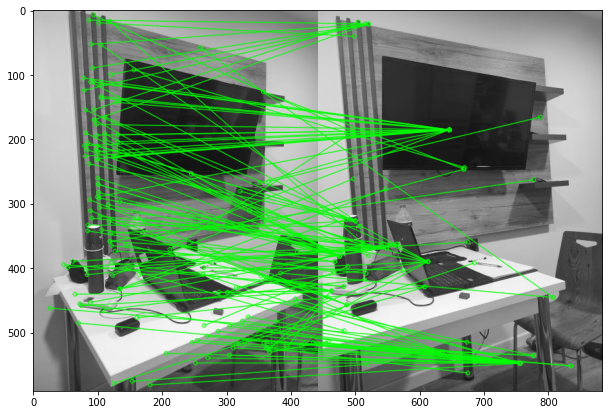

(<matplotlib.image.AxesImage at 0x7efe384ca8d0>, None)

In [ ]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)

img3 = cv2.drawMatches(imgL,keypoints_1,imgR,keypoints_2,good_matches,None,**draw_params)
plt.figure(figsize = (14,7))
plt.imshow(img3, 'gray'),plt.show()

#### *References*

Keypoints: https://docs.opencv.org/4.x/d2/d29/classcv_1_1KeyPoint.html
DMatch : https://docs.opencv.org/3.4/d4/de0/classcv_1_1DMatch.html
Cosine Similarity : https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
